# 2.0 EDA

In [42]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [51]:
# Import data
df = pd.read_csv("datasets/walmart.csv")
df_original = df.copy(deep=True)
df.columns = [i.lower() for i in df.columns]
print(f"There are {df.shape[1]} features & {df.shape[0]} samples.")

# Add date breakdown
df.date = pd.to_datetime(df.date)
df["weekday"] = df.date.dt.weekday
df["month"] = df.date.dt.month
df["year"] = df.date.dt.year
df.drop(["date"],axis=1,inplace=True)

target = "weekly_sales"
features = [i for i in df.columns if i != target]

There are 8 features & 6435 samples.


In [49]:
# Checking number of unique rows in each feature
df.nunique().sort_values()

# Checking number of unique rows in each feature
nu = df[features].nunique().sort_values()

# Numerical & categorical features
nf = []
cf = []

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

print(f"There are {len(nf)} numerical and {len(cf)} categorical features.\n")
for feature in nf:
    coef = np.corrcoef(df[feature],df['weekly_sales'])
    print(f"The correlation coefficient between weekly sales and {feature} is {coef[0][1]}")

There are 4 numerical & 5 categorical features.

The correlation coefficient between weekly sales and unemployment is -0.10617608965795416
The correlation coefficient between weekly sales and fuel_price is 0.009463786314475132
The correlation coefficient between weekly sales and cpi is -0.07263416204017625
The correlation coefficient between weekly sales and temperature is -0.06381001317946958


In [45]:
# print(nu,
#       nf,
#       cf,
#       features,
#       sep="\n\n NEXT \n\n")

holiday_flag       2
year               3
weekday            7
month             12
store             45
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
dtype: int64

 NEXT 

['unemployment', 'fuel_price', 'cpi', 'temperature']

 NEXT 

['holiday_flag', 'year', 'weekday', 'month', 'store']

 NEXT 

['store', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'weekday', 'month', 'year']


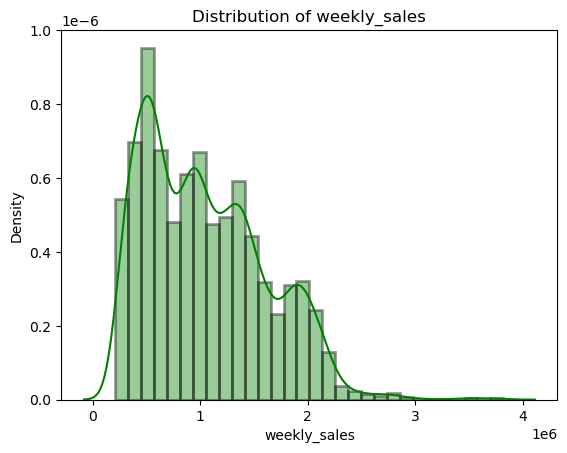

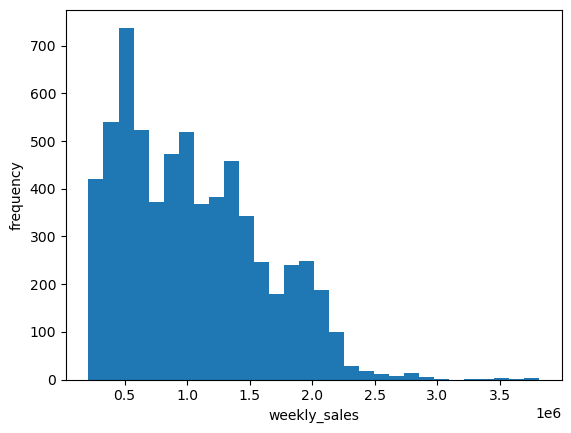

In [46]:
# Distribution of the target variable
sns.distplot(df[target],color="g",hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.title("Distribution of weekly_sales")
plt.show()
plt.hist(df[target],bins=30,label="weekly_sales")
plt.xlabel("weekly_sales")
plt.ylabel("frequency")
plt.show()

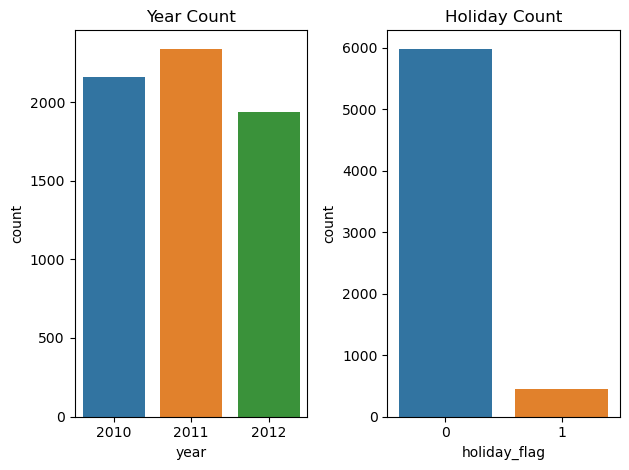

In [47]:
# Categorical features
plt.subplot(1, 2, 1)
sns.countplot(x ="year",data=df).set(title="Year Count")

plt.subplot(1, 2, 2)
sns.countplot(x ="holiday_flag",data=df).set(title="Holiday Count")

plt.tight_layout()
plt.show()

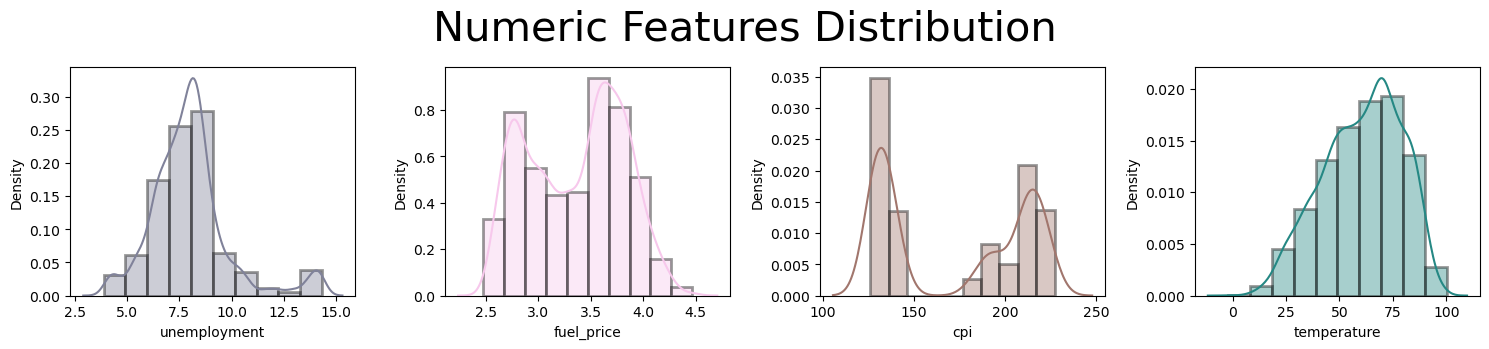

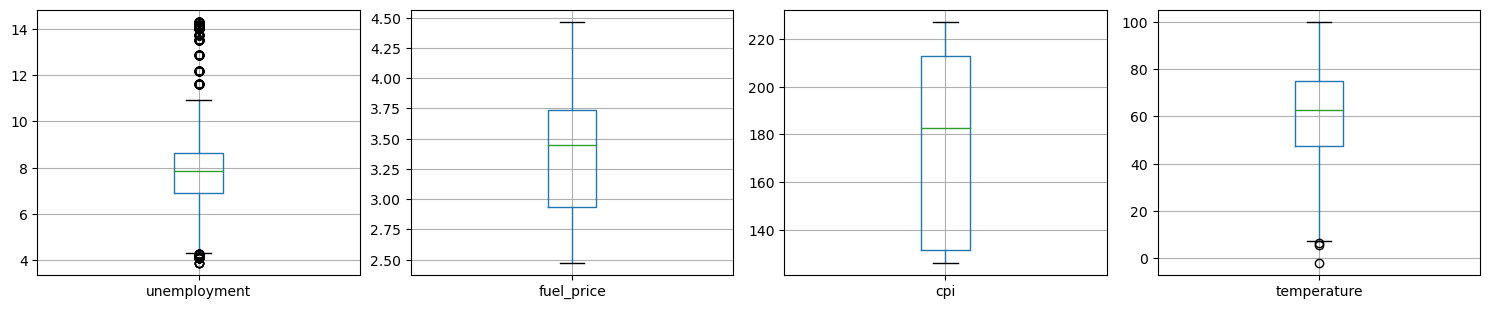

In [48]:
# Numeric features
n=4
fig = plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
fig.suptitle("Numeric Features Distribution",size=30)

for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black",linewidth=2),bins=10,
                 color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()